<a href="https://colab.research.google.com/github/darthfelipe21/LangGraph/blob/main/LangGraphAgentAsGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

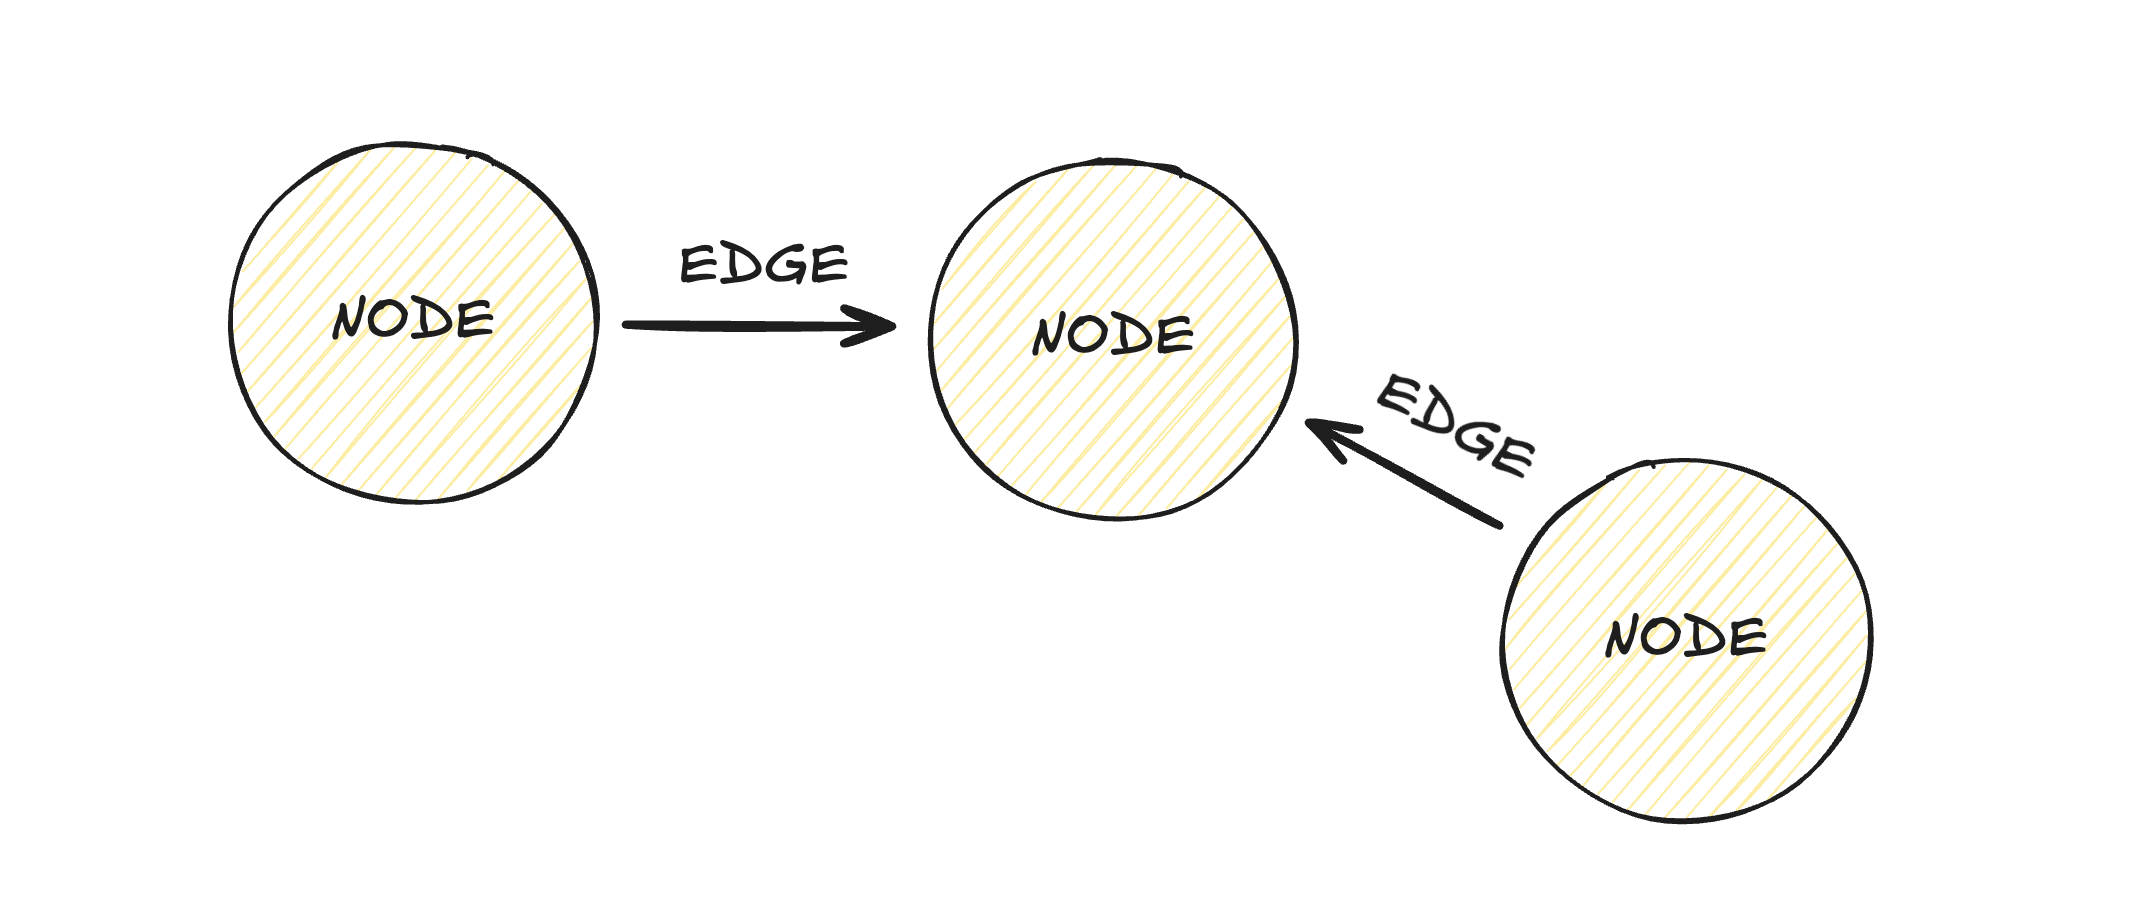

### 🕸️ Agents as graphs (the LangGraph way)

LangGraph was inspired by other graph-based tools to apply a graph-first mode of thinking to agents.

Graph **nodes** and **edges** allow agent developers to map out the exact components and actions to build more complex workflows involving LLMs.

To get started, you'll build a graph state, which will save user and assistant messages in a conversation history, so conversations can progress.

To do this, we first create a `State` class:

```py
class State(TypedDict):
    messages: Annotated[list, add_messages]
```

All this means is that the `State` class has some messages (`messages`), and these messages are a list where new messages are appended to it rather than overridden (indicated with the `add_messages()` function).

This `State` class is then converted into a graph state object using `StateGraph`.

In [ ]:
!pip install --quiet langgraph==0.5.3 langchain-openai==0.3.16

In [ ]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

# Create the state to capture the messages
class State(TypedDict):
    messages: Annotated[list, add_messages]

# Create the graph state
graph_builder = StateGraph(State)

This graph state is often assigned to `graph_builder` or `workflow`, as this object represents the instructions to create the graph rather than the graph itself. This is analogous to a recipe and the final meal.

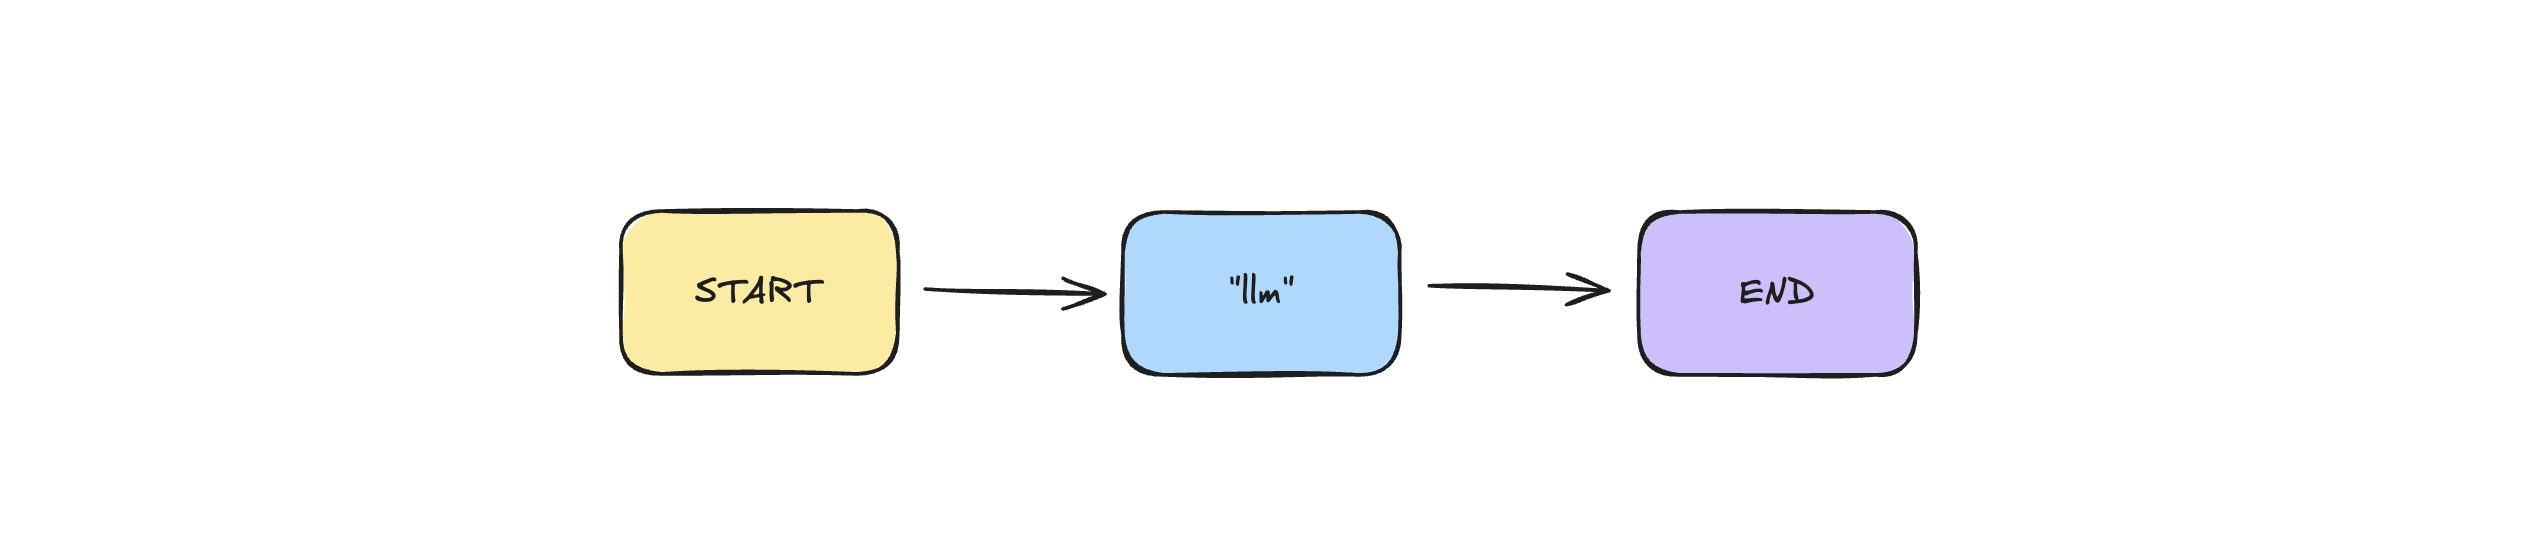

With the graph state up and running, it's time to define your first node and edges. You'll create a graph composed only of a `"llm"` node, which is simply and LLM, connected to a `START` and `END` node with edges.

`START` and `END` are fixed, built-in nodes indicating where a user input should enter the graph and a final response should exit it.

We'll use OpenAI's `"gpt-4o-mini"`, but any LangChain-compatible LLM would work here (with potentially differing performance). We've configured your environment so you don't need to specify an OpenAI API key.

In [ ]:
import os
from langchain_openai import ChatOpenAI

# Define an OpenAI LLM
llm = ChatOpenAI(model='gpt-4o-mini')

# Takes the state, and appends the new messages to it
def llm_node(state: State):
    return {"messages": [llm.invoke("messages")]}

In [ ]:
# Create a node called "llm" that calls the llm_node function
graph_builder.add_node("llm", llm_node)

# Connect the "llm" node to the START and END of the graph
graph_builder.add_edge(START, "llm")
graph_builder.add_edge("llm", END)

# Compile the graph
graph = graph_builder.compile()

### 🖼️ Visualize your first graph

If you execute your graph object, it will display your graph as a visualization. Pretty neat, right?

In [ ]:
# Visualize your graph
graph

Let's have some fun with your first graph! 🚀

Run the code below to begin talking to it in real-time. Feel free to try different inputs by changing the message content.

Note: If this cell hangs, click the stop button next to the cell.

In [ ]:
from course_helper_functions import pretty_print_messages

for chunk in graph.stream(
    {"messages": [{"role": "user", "content": "Tell me about Apple Inc."}]}
):
    pretty_print_messages(chunk)